# **Loading Dataset**

First load the required HR dataset using pandas’ read CSV function. 
The dataset has 14999 rows and 10 columns 

You can run the program on google colab by taping on the link :- https://colab.research.google.com/drive/1Sb1j7MFhGLAtwLSrqju99Y7lJ_4fk5gO?usp=sharing

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('HR_dataSet.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# **Preprocessing: Label Encoding**

*   Many Machine learning algorithms process numerical input data.
*   Categorical columns need to be represented in a numerical column
*   To encode Categorical data, map each value to a number. 
>   **E.g.** Salary column’s value can be represented as 
>        low:0
>        medium:1
>        high:2

This process is known as **label encoding**. In sklearn, this is done using **LabelEncoder**

The preprocessing module is imported and the LabelEncoder object is created. The categorical **“salary”** and **“Departments“** column is transformed into the numeric column using the LabelEncoder object using **fit_transform** function.

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Converting string labels into numbers since these two columns contain only string datatype values
# This leads to the appending of new columns in the dataset
# you can check it by print(data.shape) print(data.columns)

data['Encoded Salary'] = le.fit_transform(data['salary'])
data['Dept'] = le.fit_transform(data['sales'])
# Displaying to see the transformation
# print(data[['Encoded Salary','Dept']])

# The unique() function is used to find the unique elements of an array. Returns the sorted unique elements of an array.
print(data.sales.unique())
print(data.Dept.unique())

# numpy.ravel(a, order='C') :- Return a contiguous flattened array.
# ‘K’ means to read the elements in the order they occur in memory, except for reversing the data when strides are negative.
pd.unique(data[['sales', 'Dept']].values.ravel('K'))

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']
[7 2 3 9 8 4 0 6 5 1]


array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD', 7, 2, 3, 9, 8, 4, 0, 6,
       5, 1], dtype=object)

# **Split the dataset**

**Aim:** To assess the model performance, the dataset needs to be split into train and test set. 

**Function Used:** Let’s split dataset by using function **train_test_split()**

There are 3 parameters 
>        features
>        target
>        test_set size

In [61]:
# Spliting data into Features
# insttead of 'sales', 'salary' we have used 'Dept' and 'Encoded Salary'
from sklearn.model_selection import train_test_split
X = data[['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company', 'Work_accident','promotion_last_5years','Dept','Encoded Salary']]
y = data['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Build the Classification Model**

**Aim:** Build an ***employee churn prediction model*** (predict if the employee will leave the organization or not) using **MLPClassifier.**

**Steps:**  
*   import the MLPClassifier module 
*   Create MLP Classifier object using MLPClassifier() function
*   Fit our model on the train set using fit()
*   Perform prediction on the test set using predict()

**Parameters**:
*   **hidden_layer_sizes:** it is a tuple where each element represents one layer and its value represents the number of neurons on each hidden layer.
*   **learning_rate_init:** It used to controls the step-size in updating the 
      weights. 
*   **random_state:** It defines the random number for weights and bias 
      initialization.
*   **verbose:** It used to print progress messages to standard output.
*   **activation:** Activation function for the hidden layer. 
      Examples, identity, logistic, tanh, and relu. 
      *By default,* **relu** is used as an activation function.

**Test for new data points and predict** 

In [62]:
from sklearn.neural_network import MLPClassifier
# Create model object
clf = MLPClassifier(hidden_layer_sizes=(6, 5),random_state=5,learning_rate_init=0.01)

# Fit data onto the model
clf.fit(X_train, y_train)

testX = [[0.37, 0.32, 2, 188, 3, 0, 0, 7, 0]]  # Employee will leave
# testX = [[0.77, 0.72, 2, 159, 3, 0, 0, 2, 2]]    #Employee will stay
testpred = clf.predict(testX)
print("testpred is :", testpred)

if testpred == 0:
  print("Employee will stay")
else:
  print("Employee will leave")

testpred is : [1]
Employee will leave


C:\Users\adity\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


# **Hand-coded Mini-Batch learning**

*   N_TRAIN_SAMPLES will be got from the # of rows in shape[0] of the dataset 
*   N_EPOCHS and N_BATCH are hard-coded for this programs as 25 and 128 respectively 
*   N_CLASSES will be [0,1] as this is the outcome to be predicted '0' measn employee will stay and '1' means employee will leave

**Mini Batch Training is done** 

*   To ensure random # of samples for mini-batch training **random.permutation** function is used
*   The training is done for  N_EPOCHS. Here it is 25 epochs. 

**Plots**
*   The Accuracy score for the train and test dataset is plotted 

In [63]:
# N_TRAIN_SAMPLES = X_train.shape[0]
# N_EPOCHS = 25
# N_BATCH = 128
# N_CLASSES = np.unique(y_train)

# scores_train = []
# scores_test = []

# # EPOCH
# epoch = 0
# while epoch < N_EPOCHS:
#     #print('epoch: ', epoch)
#     # SHUFFLING
#     # Do randon permutation umtil the # of rows in dataset. Here it is 14,999
#     random_perm = np.random.permutation(X_train.shape[0])
#     mini_batch_index = 0

#     #Do mini-batch training until # of rows are reached
#     while True:
#         # MINI-BATCH
#         # Do for a random # of rows + fixed batch sixe
#         indices = random_perm[mini_batch_index:mini_batch_index + N_BATCH]
#         # Fit the MLP Classifier
#         clf.partial_fit(X_train.iloc[indices],y_train.iloc[indices], classes=N_CLASSES)
#         # Do for the rest after the previous mini-batch index
#         mini_batch_index += N_BATCH

#         if mini_batch_index >= N_TRAIN_SAMPLES:
#             break

#     # ACCURACY SCORE FOR TRAIN
#     scores_train.append(clf.score(X_train, y_train))

#     # ACCURACY SCORE FOR TEST
#     scores_test.append(clf.score(X_test, y_test))

#     epoch += 1

# """ Plotting the Accuracy Score Over the 25 Epochs"""
# fig, ax = plt.subplots(2, sharex=True, sharey=True)
# ax[0].plot(scores_train)
# ax[0].set_title('Train')
# ax[1].plot(scores_test)
# ax[1].set_title('Test')
# fig.suptitle("Accuracy over epochs", fontsize=14)
# plt.show()


# **Make Prediction and Evaluate the Model**

*   Predictions are made on the test dataset
*   Assess model accuracy based on available actual labels of the test dataset. 


In [64]:
# Make prediction on train dataset
from sklearn.metrics import accuracy_score
ypredtrain = clf.predict(X_train)
# Calcuate accuracy
print("Accuracy Score for Train Data is", accuracy_score(y_train, ypredtrain))
# Make prediction on test dataset
ypredtest = clf.predict(X_test)
# Calcuate accuracy
print("Accuracy Score for Test Data is", accuracy_score(y_test, ypredtest))

Accuracy Score for Train Data is 0.9455787982331861
Accuracy Score for Test Data is 0.938


# **Model Measurement Analysis** 

*   Confusion Matrix 
*   Accuracy 
*   Precision 
*   Recall 

# **CONFUSION MATRIX FOR TRAIN DATASET**

In [81]:
from sklearn.metrics import confusion_matrix

TN, FP, FN, TP = confusion_matrix(list(y_train), list(ypredtrain), labels=[1, 0]).ravel()
print("For Train Data")
print(f'True Negative :- {TN} \nTrue Positive :- {TP} \nFalse Negative :- {FN} \nFalse Positive :- {FP}')

conftrain = confusion_matrix(y_train, ypredtrain)
print("Train Confusion Matrix is :- \n", conftrain)

For Train Data
True Negative :- 2647 
True Positive :- 8699 
False Negative :- 435 
False Positive :- 218
Train Confusion Matrix is :- 
 [[8699  435]
 [ 218 2647]]


# **CONFUSION MATRIX FOR TEST DATASET**

In [82]:
TN, FP, FN, TP = confusion_matrix(list(y_test), list(ypredtest), labels=[1,0]).ravel()
print("For Test Data")
print(f'True Negative :- {TN} \nTrue Positive :- {TP} \nFalse Negative :- {FN} \nFalse Positive :- {FP}')

conftest = confusion_matrix(y_test, ypredtest)
print("Test Confusion Matrix is\n", conftest)

For Test Data
True Negative :- 639 
True Positive :- 2175 
False Negative :- 119 
False Positive :- 67
Test Confusion Matrix is
 [[2175  119]
 [  67  639]]


# **CALCULATING PRECISION SCORE AND RECALL SCORE OF THE TEST AND TRAIN DATASET**

In [86]:
from sklearn.metrics import precision_score , recall_score
print(f"Test Precision is : {precision_score(y_test, ypredtest):.3f}")
print(f"Train Precision is : {precision_score(y_train, ypredtrain):.3f}")
print(f"Test Recall is : {recall_score(y_test, ypredtest):.3f}")
print(f"Train Recall is : {recall_score(y_train, ypredtrain):.3f}")

Test Precision is : 0.843
Train Precision is : 0.859
Test Recall is : 0.905
Train Recall is : 0.924


# **PLOTTING THE CONFUSION MATRIX IN GRAPH FORM FOR THE TRAIN AND TEST DATASET**

Text(0.5, 1.0, 'Test Confusion Matrix')

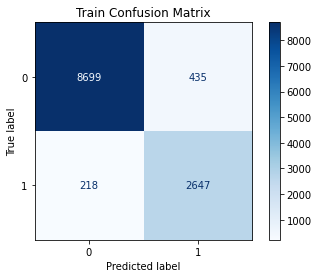

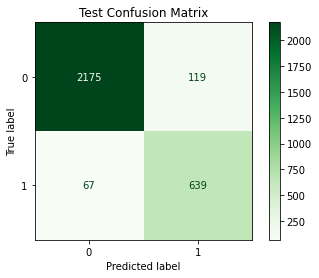

In [101]:
from sklearn.metrics import ConfusionMatrixDisplay
myplt = plt.figure(figsize=(8, 8))
ax1 = myplt.add_subplot(2, 2, 1)
disp = ConfusionMatrixDisplay(confusion_matrix=conftrain)
disp.plot(cmap=plt.cm.Blues)
plt.title("Train Confusion Matrix")

disp = ConfusionMatrixDisplay(confusion_matrix=conftest)
disp.plot(cmap=plt.cm.Greens)
plt.title("Test Confusion Matrix")